In [2]:
## Setup
from notebook_utils import resolve_paths_from_parent_directory
# auto reload notebook deps
%reload_ext autoreload
%autoreload 2
resolve_paths_from_parent_directory()

In [3]:
# imports
from datetime import datetime
from experiment_pipeline.data_loader import load_global_feature_set
from experiment_pipeline.feature_sets import baseline_important_features, baseline_important_features_with_stop_stats
from run_experiment import run_experiment
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor


data_dir = "../data"
route_str = "B46"
station_str = "JFK"
direction_int = 1


## Prepare globlal feature set
df_route, stop_id_ls = load_global_feature_set(data_dir, route_str, station_str, direction_int)


In [5]:
model = LassoCV()

experiment_evals = []
for refit_interval in [
     None, 
#    "7D", "3D", 
#    "1D", "12H", "6H", "3H"
]:
    print(f"Refit interval experiment, refit_interval={refit_interval}")
    experiment_eval = run_experiment(
        global_feature_set=df_route,
        feature_extractor_fn=baseline_important_features_with_stop_stats,
        model=model,
        stop_id_ls=stop_id_ls,
        dependent_variable="passenger_count",
        split_heuristic="datetime",
        split_datetime=datetime(year=2021, month=9, day=15, hour=0, minute=0),
        test_period="14D",
        refit_interval=refit_interval,
        random_state=0,
        experiment_name="length-prediction",
        experiment_dir="../saved_experiments/"
    )

    print('\n')
    print("Train")
    model_pred_eval, mean_pred_eval = experiment_eval.basic_eval("train", pretty_print=True)
    print('\n')
    print('-----------------------------')
    print('\n')
    print("Test")
    model_pred_eval, mean_pred_eval = experiment_eval.basic_eval("test", pretty_print=True)
    print('\n')
    print('=============================')
    print('\n')
    experiment_evals.append(experiment_eval)

Refit interval experiment, refit_interval=None
split: fitting on train data until 2021-09-15 00:00:00: 95,212 rows
split: testing from 2021-09-15 00:00:00 to 2021-09-29 00:00:00: 19,322 rows
Fitting model...
Inference...


Train


AttributeError: 'Evaluation' object has no attribute 'basic_eval'

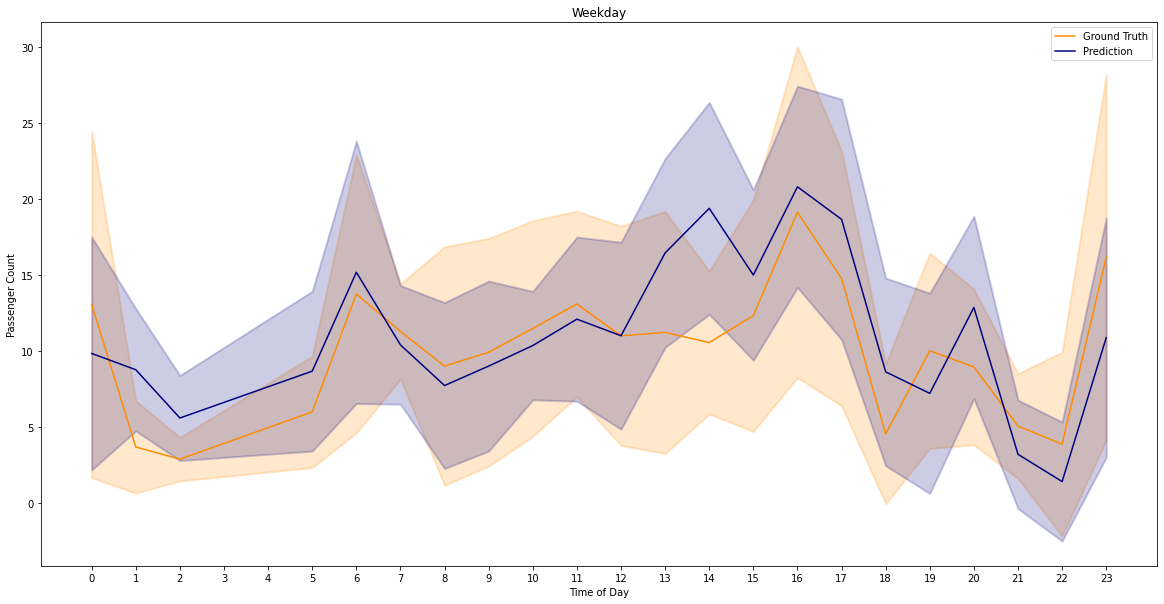

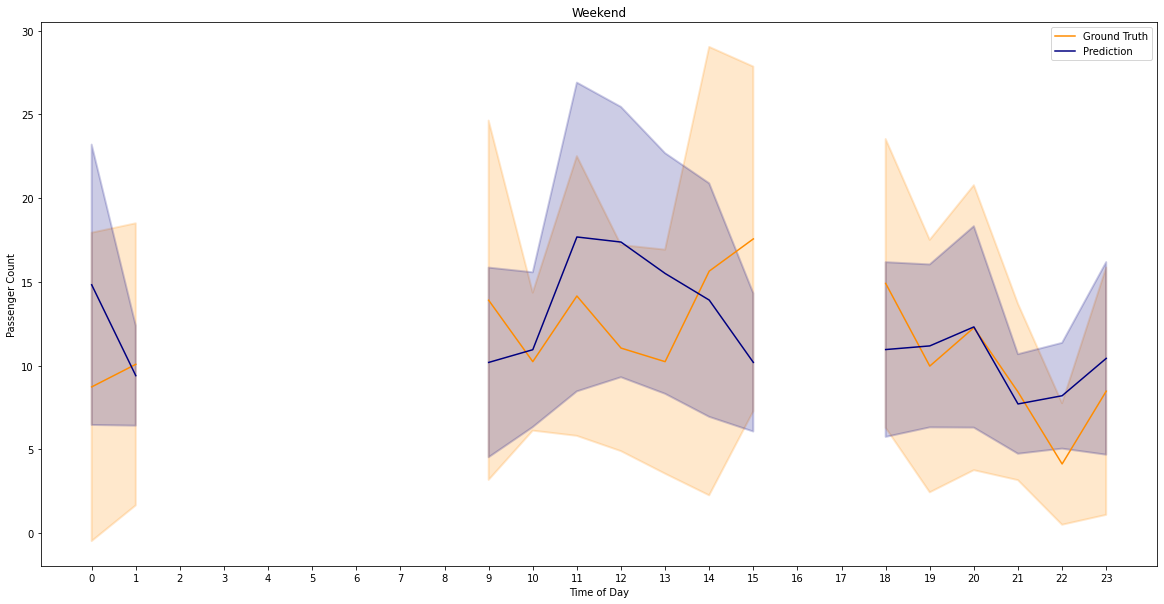

In [175]:
fig = experiment_eval.plot_passenger_count_by_time_of_day('test', segment=None, agg='mean')

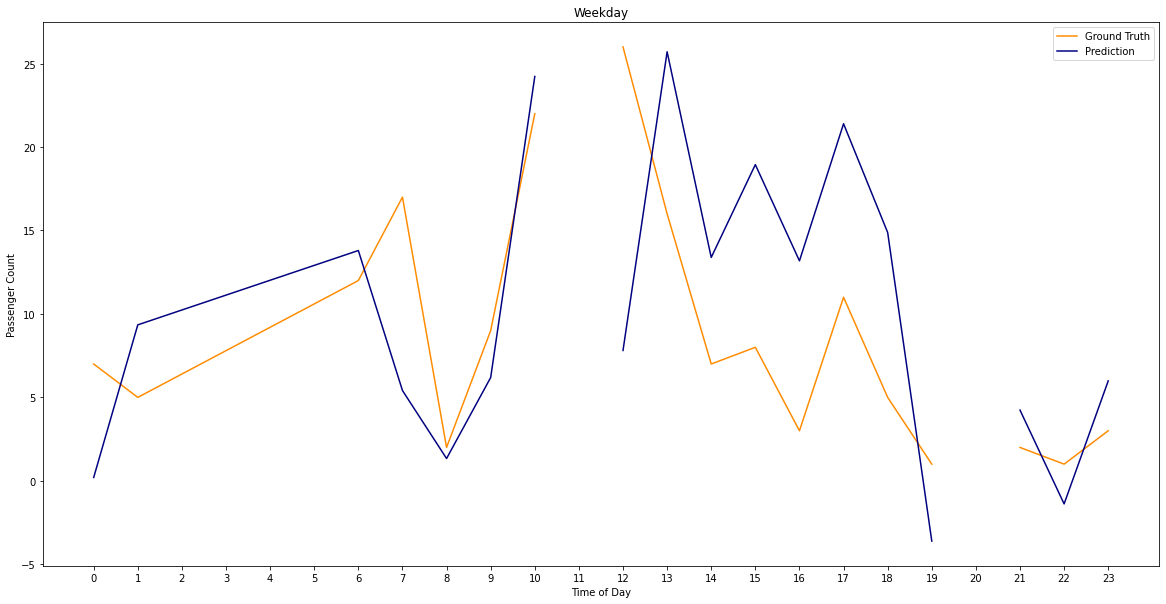

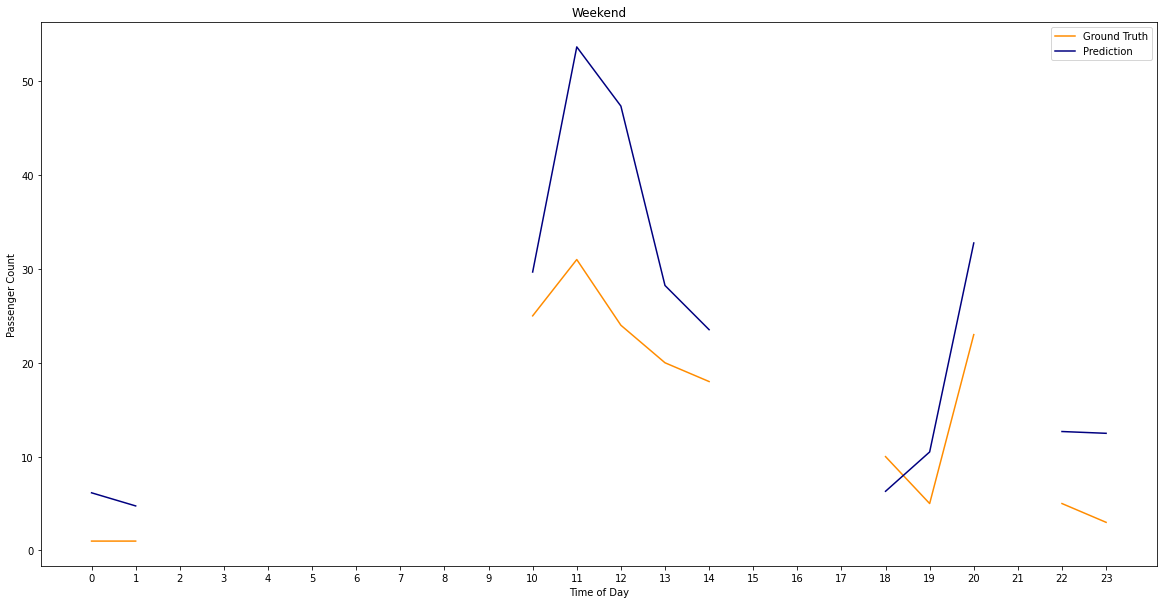

In [176]:
fig = experiment_eval.plot_passenger_count_by_time_of_day('test', segment=46, agg='sum')

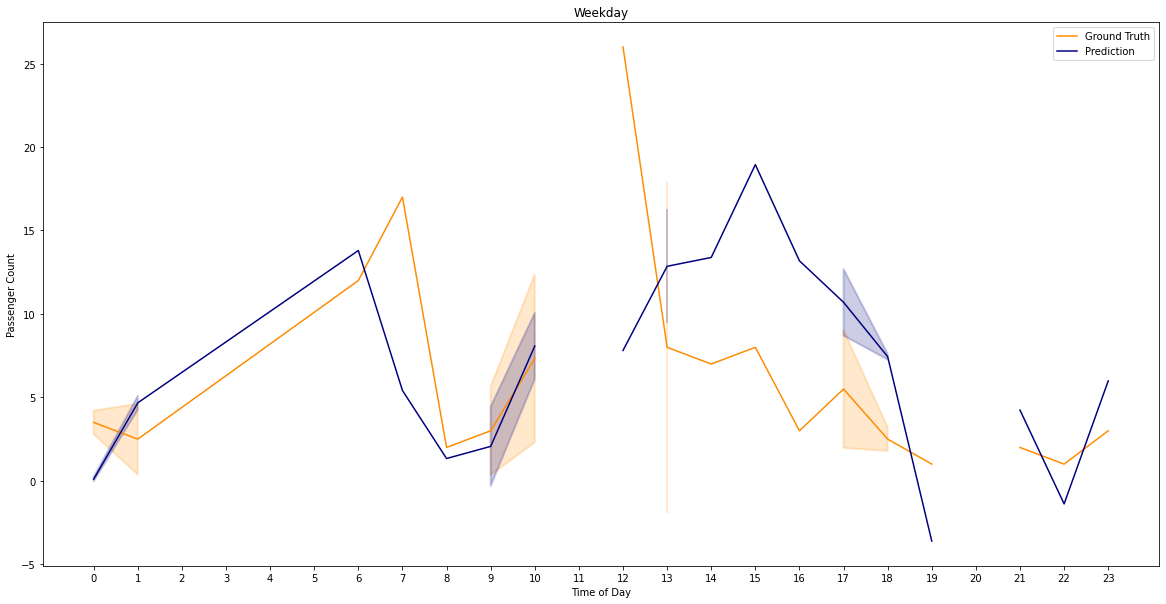

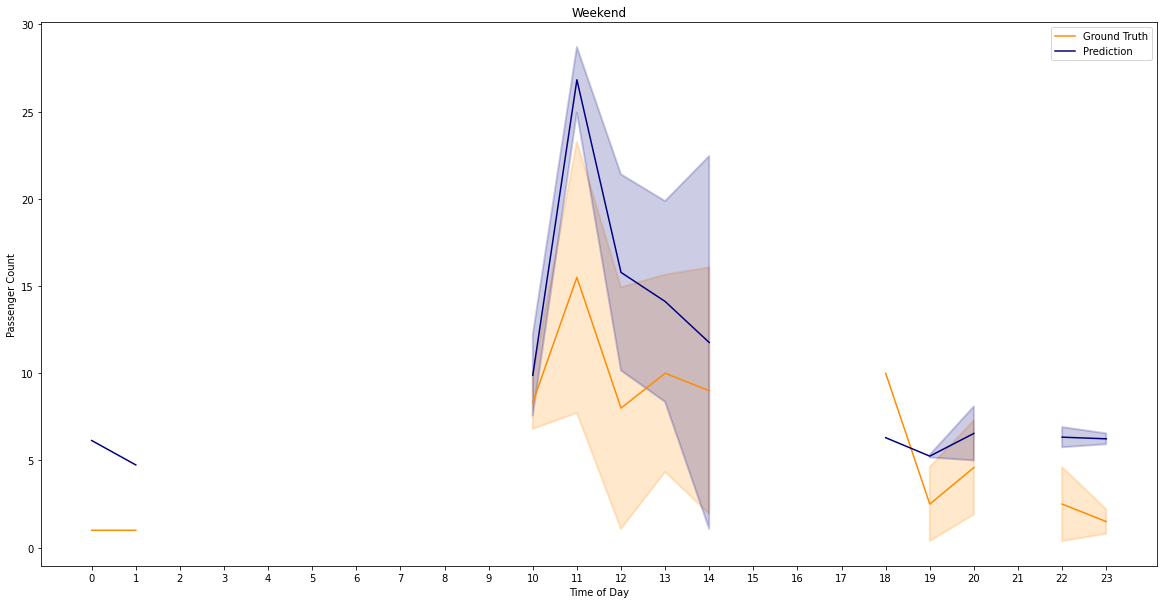

In [177]:
fig = experiment_eval.plot_passenger_count_by_time_of_day('test', segment=46, agg='mean')

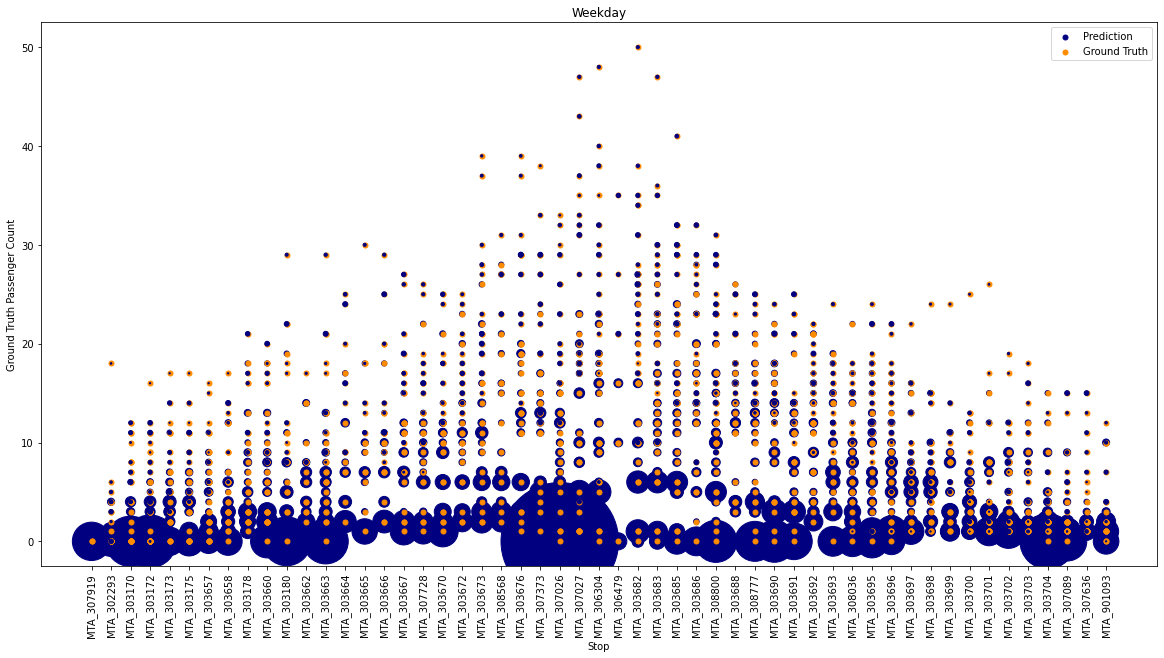

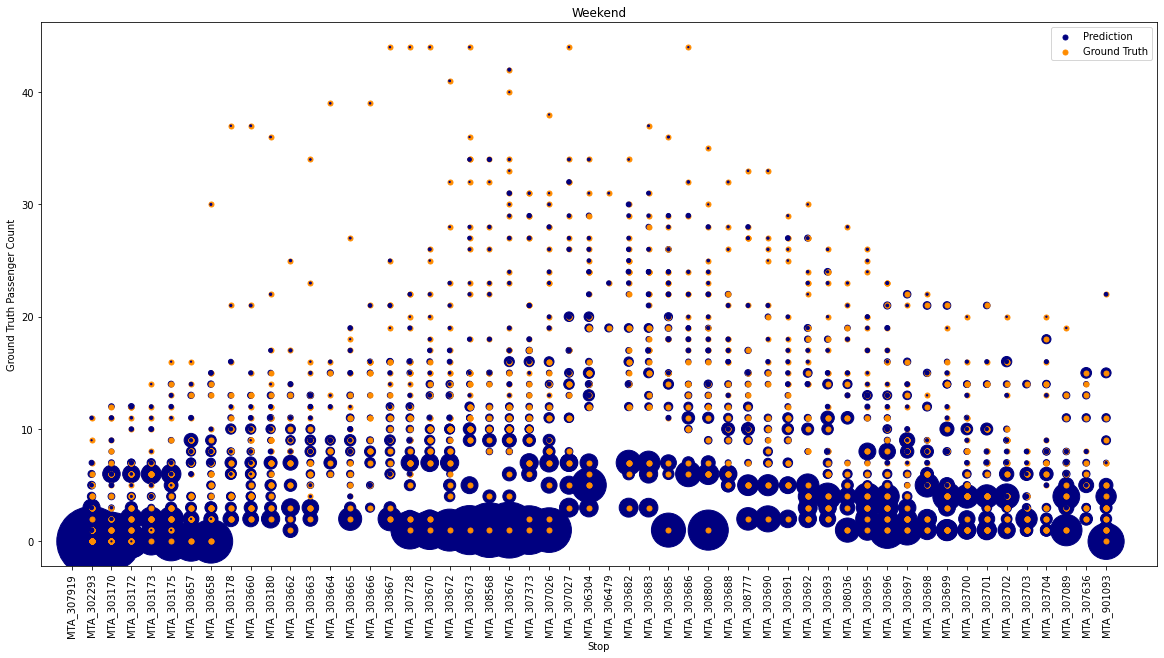

In [179]:
fig = experiment_eval.gt_pred_scatter('test', eps=1, s=25, lower=0.25, upper=None)

In [183]:
bal_acc, cr_dict, cm = experiment_eval.print_classification_metrics('test', segment=None, method='q25q75', num_classes=3, spread_multiple=1, pretty_print=True)

Labels: -1 = sparse | 0 = normal | 1 = crowded


Balanced Accuracy: 0.43900228018714116


Classification Report:
              precision    recall  f1-score   support

          -1       0.43      0.21      0.28       549
           0       0.64      0.69      0.66      1678
           1       0.33      0.41      0.37       555

    accuracy                           0.54      2782
   macro avg       0.47      0.44      0.44      2782
weighted avg       0.54      0.54      0.53      2782



Confusion Matrix:
[[ 116  376   57]
 [ 113 1160  405]
 [  38  287  230]]
